
## Download de imagens 



In [ ]:
"""Download da imagem de teste"""
from google.colab import files as FILE
import os
import requests

img_data = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Rubiks_cube_by_keqs.jpg/220px-Rubiks_cube_by_keqs.jpg').content

with open('cubo.jpg', 'wb') as handler:
    handler.write(img_data)

# Operações básicas com OpenCV

Ver mais em:
 
*  https://colab.research.google.com/drive/1DHR9MdPWbEyVoabID7OfjKB2wz25kdmb?usp=sharing
*   https://learnopencv.com/getting-started-with-opencv/



# **Mudança de sistemas de cores com OpenCV** 




Objetivos: 

*   apresentar a conversão de um sistema de cor para outro com a biblioteca opencv, muito conhecida por conter funções para manipulação e processamento de imagens;
*   apresentar duas aplicações onde a conversão é aplicada: a primeira voltada para extração de objeto com base em cores esperadas; já a segunda, para a seleção de imagens que possuem determinada cor predominante. 



## Função cv.cvtColor()
No OpenCV, a função que faz a conversão entre os espaços de cores: é a **cv.cvtColor()**. A mesma recebe uma flag, a qual especifica os sistemas de origem e o de destino.
 
Exemplo:

**hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)**

Onde, 

cv.COLOR_BGR2HSV é uma flag que representa que tipo de conversão será feita. No caso, temos que o espaço de origem é o BGR e o de destino HSV. 
Ao todo, o opencv tem mais de 150 dessas flags. Para outros tipos de conversão, [acessar página.](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#gga4e0972be5de079fed4e3a10e24ef5ef0aa4a7f0ecf2e94150699e48c79139ee12)

## Flags para conversão

In [ ]:
"""imprime todas as flags utilizadas para conversão entre sistemas de cores"""
import cv2 as cv

flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

## Modelo RGB
O padrão do OpenCv é o RGB, porém este armazena as cores em formato BGR. Por isso, às vezes, ao exibirmos uma imagem ela pode estar com cores não esperadas. Para corrigir isso, basta chamar a função cvtColor():

```
cv.cvtColor(frame, cv.COLOR_BGR2RGB)
```


O modelo RGB é aditivo e seus canais guardam respectivamente informações de intensidades das cores *vermelha, verde e azul*.

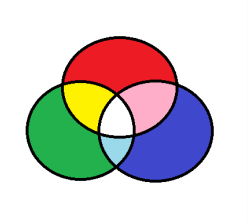

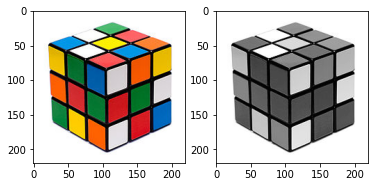

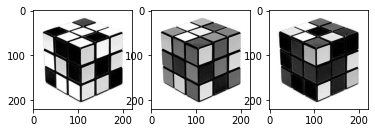

In [ ]:
import numpy as np
import cv2 as cv
from IPython.display import Image, display
from google.colab.patches import cv2_imshow # for image display
from PIL import Image
import matplotlib.pyplot as plt

# BGR
src = cv.imread('cubo.jpg')

# Convert BGR to GRAYSCALE
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY) 


# BGR -> RGB
src_rgb  = cv.cvtColor(src, cv.COLOR_BGR2RGB)

#
plt.subplot(1, 2, 1)
plt.imshow(src_rgb)
plt.subplot(1, 2, 2)
plt.imshow(gray,cmap="gray")
plt.show()

# Visualizando os canais separadamente
R, G, B = cv.split(src_rgb)

plt.subplot(1, 3, 1)
plt.imshow(R, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(G, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(B, cmap="gray")
plt.show()



## Modelo HSV



*   ***H**ue* (Matiz): especifica o ângulo da cor no círculo RGB. Uma matiz de 0° resulta em vermelho, 120° resulta em verde e 240° resulta em azul.
*   ***S**aturation* (Saturação): controla a quantidade de cor usada. Uma cor com saturação de 100% será a cor mais pura possível, enquanto a saturação de 0% resulta em tons de cinza.
*   ***V**alue* (Luminância): controla o brilho da cor. Uma cor com 0% de brilho é preto puro, enquanto uma cor com 100% de brilho não tem preto misturado à cor.
 
O modelo HSV tenta representar as cores percebidas pelo olho humano. O valor de matiz varia de 0-179, o valor para saturação e luminância variam de 0 a 255. É usado principalmente para segmentação de cores.


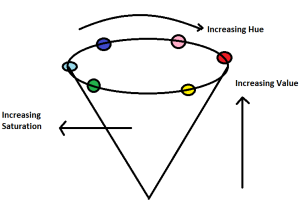

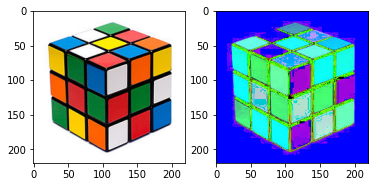

In [ ]:
# Convert BGR to HSV
hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)

plt.subplot(1, 2, 1)
plt.imshow(src_rgb)
plt.subplot(1, 2, 2)
plt.imshow(hsv)
plt.show()

## Modelo HSL

*   **H**ue (Matiz):especifica o ângulo da cor no círculo de cores RGB, exatamente como HSV.
*   **S**aturation (Saturação): controla a pureza da cor.
*   **L**ightness (Brilho): controla a luminosidade da cor. Uma cor com 0% de brilho é preta, 50% é a cor mais pura possível e 100% é branca.

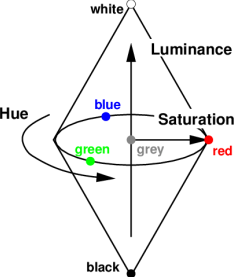

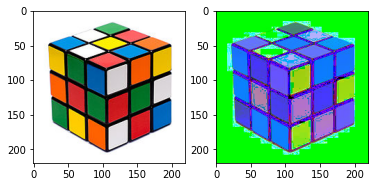

In [ ]:
# Convert BGR to HSV
hsl = cv.cvtColor(src, cv.COLOR_BGR2HLS)

plt.subplot(1, 2, 1)
plt.imshow(src_rgb)
plt.subplot(1, 2, 2)
plt.imshow(hsl)
plt.show()

## Modelo CMYK

O modelo CMYK funciona 


*   **C** - ciano
*   **M** - magenta
*   **Y** - amarelo
*   **K** - preto

Modelo subtrativo, ou seja, as cores são percebidas como resultado da luz refletida. Por exemplo, quando a luz incide sobre uma superfície ciano, o vermelho é absorvido (ou subtraído) enquanto as cores verde e azul são refletidas e, portanto, G+B=ciano. Da mesma forma ocorre para o magenta e amarelo. Uso: impressão de livros, revistas, etc. 

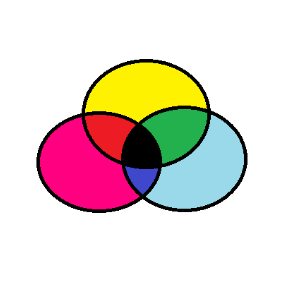

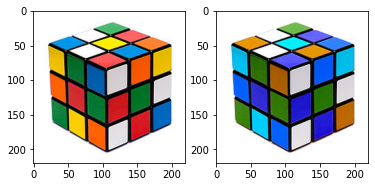

In [ ]:
from PIL import Image

# Convert BGR to CMYK
cmyk_image = Image. fromarray(src).convert('CMYK')


plt.subplot(1, 2, 1)
plt.imshow(src_rgb)
plt.subplot(1, 2, 2)
plt.imshow(cmyk_image)
plt.show()

## Modelo CieLab



*   **L**ightness (Brilho):
*   **a** e **b** são coordenadas de cromaticidade. 

O espaço de cores CIELab é o mais complexo e o mais robusto para comparações quantitativas. Foi definido pela *International Commission on Illumination (CIE)* com a intenção de ser um espaço de cores perceptualmente uniforme, o que significa que conjunto de cores separados pela mesma distância no espaço CIELab aparecerão igualmente diferentes. Os três canais do espaço de laboratório são Brilho(preto para branco), *a* (verde para vermelho) e *b* (azul para amarelo). 

Uma das vantagens do CIELab é que ele é independente de dispositivo. As cores que ele define não são relativas a nenhum dispositivo específico, como um monitor ou uma impressora.

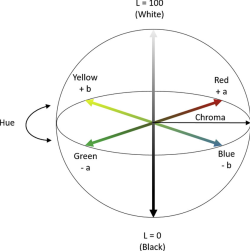

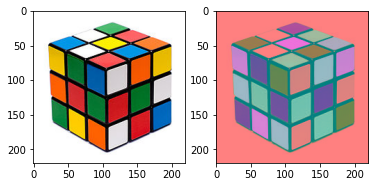

In [ ]:
# Convert BGR to CieLab
cielab = cv.cvtColor(src, cv.COLOR_BGR2Lab)

plt.subplot(1, 2, 1)
plt.imshow(src_rgb)
plt.subplot(1, 2, 2)
plt.imshow(cielab)
plt.show()

## Aplicação 1: Extração de objeto 

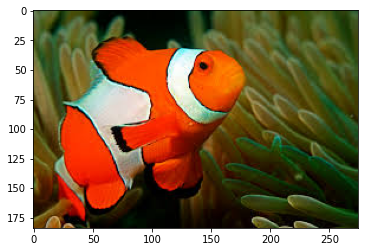

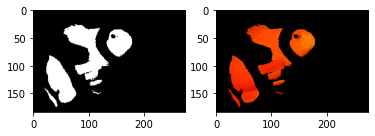

In [ ]:
"""Download da imagem de teste"""
#Tutorial: https://realpython.com/python-opencv-color-spaces/
from google.colab import files as FILE
import os
import requests
import cv2
# import matplotlib.pyplot as plt
import numpy as np

img_data = requests.get('https://github.com/realpython/materials/blob/master/opencv-color-spaces/images/nemo0.jpg?raw=true').content
with open('nemo0.jpg', 'wb') as handler:
    handler.write(img_data)

nemo = cv2.imread('nemo0.jpg')
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

plt.imshow(nemo)
plt.show()

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

result = cv2.bitwise_and(nemo, nemo, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()





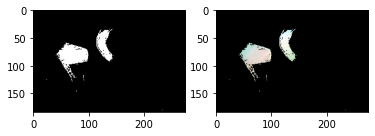

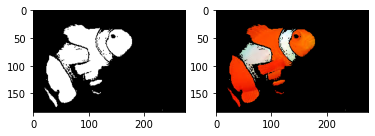

In [ ]:
# Capturando as faixas brancas do nemo
light_white = (0, 0, 200)
dark_white = (145, 60, 255)


mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)

result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

final_mask = mask + mask_white
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()


# Aplicação 2: Identificação de cores usando Aprendizado de Máquina
Objetivo: neste exemplo, um algoritmo para aprendizado de máquina, KMeans, é 
usado para extrair cores predominantes na imagem de entrada. Com essas informações, uma função para seleção de imagens com base em sua cor é apresentada. Durante esse processo, algumas conversões entre sistemas de cor são executadas.


In [ ]:
"""Download de imagens"""
from google.colab import files as FILE
import os
import requests
from google.colab.patches import cv2_imshow # for image display

images = ['https://github.com/kb22/Color-Identification-using-Machine-Learning/blob/master/sample_image.jpg?raw=true',
          'https://github.com/kb22/Color-Identification-using-Machine-Learning/blob/master/images/image_1.jpg?raw=true',
          'https://github.com/kb22/Color-Identification-using-Machine-Learning/blob/master/images/image_2.jpg?raw=true',
          'https://github.com/kb22/Color-Identification-using-Machine-Learning/blob/master/images/image_3.jpg?raw=true',
          'https://github.com/kb22/Color-Identification-using-Machine-Learning/blob/master/images/image_4.jpg?raw=true',
          'https://github.com/kb22/Color-Identification-using-Machine-Learning/blob/master/images/image_5.jpg?raw=true']

idx = 0
for img_url in images:   
  
  img_data = requests.get(img_url).content

  with open('image_'+str(idx)+'.jpg', 'wb') as handler:
      handler.write(img_data)
  idx += 1


**Identificando cores predominantes**

[array([179.43250577, 180.01945462, 186.4283815 ]),
 array([54.33234931, 67.08482694, 34.05864988]),
 array([120.86857314, 125.46620146, 125.11066398]),
 array([30.2071153 , 38.63993174, 21.14449473]),
 array([206.54114052, 206.24043949, 213.72127354]),
 array([84.00107285, 90.85764576, 92.13186039]),
 array([109.04645002, 124.74302367,  55.83786648]),
 array([77.7729745 , 95.41626051, 38.32937769])]

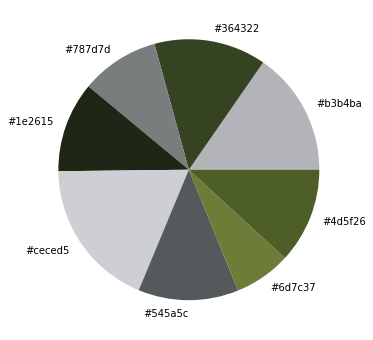

In [ ]:
#Fonte: https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    # KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to reshape the image data.
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    # We then fit and predict on the same image to extract the prediction into the variable labels.

    # fit_predict() is more relevant to unsupervised learning where we don't have labelled inputs
    labels = clf.fit_predict(modified_image)
    
    # conta a qtde de elementos presentes em cada cluster
    counts = Counter(labels)
    # print('counts before: ', counts)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    # print('counts after: ', counts)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

# Main
# image = cv2.imread('image_0.jpg')
# cv2_imshow(image)

get_colors(get_image('image_0.jpg'), 8, True)


**Selecionando imagens com base na cor**

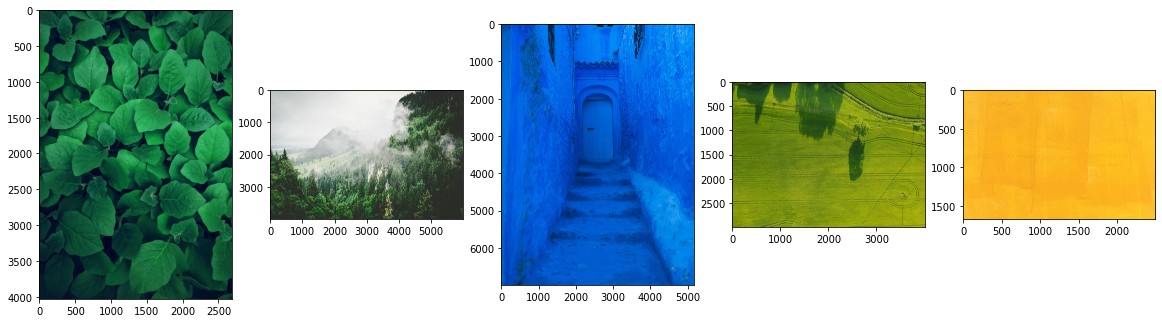

In [ ]:
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}

images = []

for idx in range(1,6):
  images.append(get_image('image_'+str(idx)+'.jpg'))
  
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])


In [ ]:
"""
Valores hexadecimais ou RGB não podem ser comparados diretamente, então,
primeiro converte-se para o espaço CieLab para posteriormente usar-se a
função deltaE_cie76 que calcula a distância entre duas cores. 
O método a seguir encontra a diferença entre as X cores predominantes na
imagem e seleciona a mesma se ao menos ela tiver uma cor predominante 
suficientemente próxima da cor selecionada. 
"""

def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    #  We use the method rgb2lab to convert the selected color to a format we can compare. 
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1


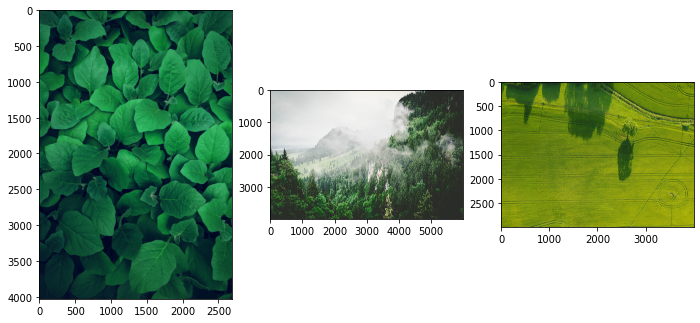

In [ ]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)
# show_selected_images(images, COLORS['BLUE'], 60, 5)
# show_selected_images(images, COLORS['YELLOW'], 60, 5)
